In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [306]:
df = pd.read_csv('mudah-apartment-kl-selangor.csv')

In [307]:
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [308]:
df = df[["monthly_rent", "location","property_type","rooms","size","furnished"]]
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,1842 sq.ft.,Fully Furnished
1,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1170 sq.ft.,Partially Furnished
2,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,650 sq.ft.,Fully Furnished
3,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,743 sq.ft.,Partially Furnished
4,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,494 sq.ft.,Not Furnished


In [309]:
df['monthly_rent'] = df['monthly_rent'].str.replace('\D', '', regex=True)
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
0,4200,Kuala Lumpur - Taman Desa,Condominium,5,1842 sq.ft.,Fully Furnished
1,2300,Kuala Lumpur - Cheras,Condominium,3,1170 sq.ft.,Partially Furnished
2,1000,Kuala Lumpur - Taman Desa,Apartment,3,650 sq.ft.,Fully Furnished
3,1700,Kuala Lumpur - Sentul,Apartment,2,743 sq.ft.,Partially Furnished
4,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,494 sq.ft.,Not Furnished


In [310]:
df['location'] = df['location'].str.replace('Kuala Lumpur - ', '')
df['location'] = df['location'].str.replace('Selangor - ', '')
df.head()
df.tail()

,monthly_rent,location,property_type,rooms,size,furnished
19986,1200,Kajang,Apartment,3.0,1000 sq.ft.,Partially Furnished
19987,1300,Bandar Saujana Putra,Service Residence,4.0,1427 sq.ft.,Partially Furnished
19988,1350,Kajang,Condominium,3.0,1270 sq.ft.,Partially Furnished
19989,1200,Cyberjaya,Service Residence,3.0,1100 sq.ft.,Fully Furnished
19990,1000,Cyberjaya,Studio,1.0,580 sq.ft.,Partially Furnished


In [311]:
df['size'] = df['size'].str.replace('sq.ft.', '')
df.head()
df.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_19668\691669169.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['size'].str.replace('sq.ft.', '')


,monthly_rent,location,property_type,rooms,size,furnished
19986,1200,Kajang,Apartment,3.0,1000,Partially Furnished
19987,1300,Bandar Saujana Putra,Service Residence,4.0,1427,Partially Furnished
19988,1350,Kajang,Condominium,3.0,1270,Partially Furnished
19989,1200,Cyberjaya,Service Residence,3.0,1100,Fully Furnished
19990,1000,Cyberjaya,Studio,1.0,580,Partially Furnished


In [312]:
df = df.astype({'monthly_rent':'float'})
print(df.dtypes)

monthly_rent     float64
location          object
property_type     object
rooms             object
size              object
furnished         object
dtype: object


In [313]:
df.isnull().sum()

monthly_rent     2
location         0
property_type    0
rooms            6
size             0
furnished        5
dtype: int64

In [314]:
df= df.dropna()
df.isnull().sum()

monthly_rent     0
location         0
property_type    0
rooms            0
size             0
furnished        0
dtype: int64

In [315]:
df['location'].value_counts()

Cheras             2157
Kajang             1021
Setapak             973
Shah Alam           971
Cyberjaya           879
                   ... 
Chan Sow Lin          1
Bandar Botanic        1
369                   1
Sungai Penchala       1
Puncak Jalil          1
Name: location, Length: 126, dtype: int64

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19983 entries, 0 to 19990
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_rent   19983 non-null  float64
 1   location       19983 non-null  object 
 2   property_type  19983 non-null  object 
 3   rooms          19983 non-null  object 
 4   size           19983 non-null  object 
 5   furnished      19983 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [317]:
df = df.astype({'size':'float'})

In [318]:
df['rooms'].value_counts()

3.0             6459
3               6320
2               1805
1.0             1527
2.0             1489
4                915
1                867
4.0              473
5                 54
5.0               38
6                 19
7                  6
6.0                4
More than 10       2
7.0                2
9                  1
9.0                1
10.0               1
Name: rooms, dtype: int64

In [319]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [320]:
rooms_map = shorten_categories(df.rooms.value_counts(), 100)
df['rooms'] = df['rooms'].map(rooms_map)
df['rooms'].value_counts()

3.0      6459
3        6320
2        1805
1.0      1527
2.0      1489
4         915
1         867
4.0       473
Other     128
Name: rooms, dtype: int64

In [321]:
df = df[df['rooms'] != 'Other']
df['rooms'].value_counts()

3.0    6459
3      6320
2      1805
1.0    1527
2.0    1489
4       915
1       867
4.0     473
Name: rooms, dtype: int64

In [322]:
df = df.astype({'rooms':'float'})

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19855 entries, 1 to 19990
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_rent   19855 non-null  float64
 1   location       19855 non-null  object 
 2   property_type  19855 non-null  object 
 3   rooms          19855 non-null  float64
 4   size           19855 non-null  float64
 5   furnished      19855 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [324]:
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
1,2300.0,Cheras,Condominium,3.0,1170.0,Partially Furnished
2,1000.0,Taman Desa,Apartment,3.0,650.0,Fully Furnished
3,1700.0,Sentul,Apartment,2.0,743.0,Partially Furnished
4,1299.0,Mont Kiara,Service Residence,1.0,494.0,Not Furnished
5,1500.0,Setapak,Apartment,3.0,884.0,Partially Furnished


<function matplotlib.pyplot.show(close=None, block=None)>

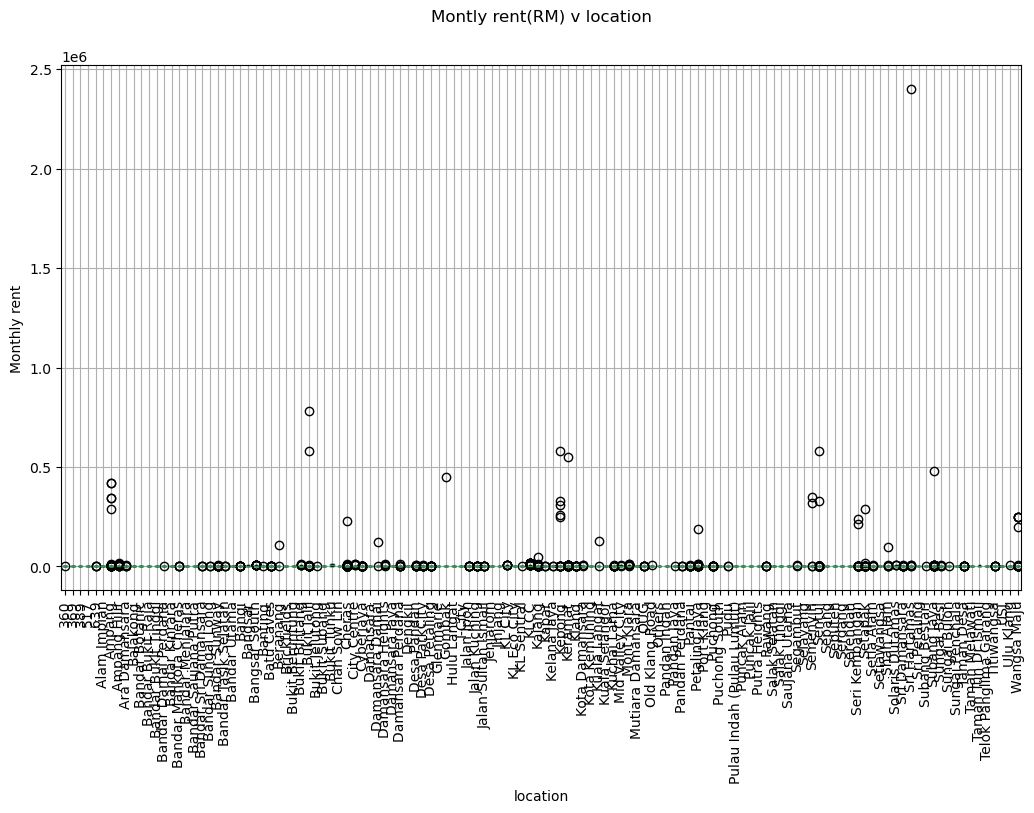

In [325]:
fig, ax = plt.subplots(1,1, figsize =(12,7))
df.boxplot('monthly_rent', 'location', ax=ax)
plt.suptitle('Montly rent(RM) v location')
plt.title('')
plt.ylabel('Monthly rent')
plt.xticks(rotation=90)
plt.show

In [326]:
df['location'].value_counts().mean()

157.5793650793651

In [327]:
locations_map = shorten_categories(df.location.value_counts(), 150)
df['location'] = df['location'].map(locations_map)
df['location'].value_counts()

Other                3373
Cheras               2148
Kajang               1021
Setapak               971
Shah Alam             969
Cyberjaya             876
Puchong               779
Sentul                777
Seri Kembangan        697
Ampang                656
Kepong                655
Petaling Jaya         611
Bukit Jalil           572
Wangsa Maju           456
Klang                 386
Keramat               301
Setia Alam            299
Old Klang Road        297
Taman Desa            294
Semenyih              285
KLCC                  278
Mont Kiara            278
KL City               260
Subang Jaya           256
Sepang                249
Damansara Perdana     248
Jalan Ipoh            224
Damansara Damai       199
Bangi                 196
Kuchai Lama           192
Batu Caves            188
Segambut              178
Sungai Besi           173
Desa Pandan           173
Kota Damansara        172
Jalan Kuching         168
Name: location, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

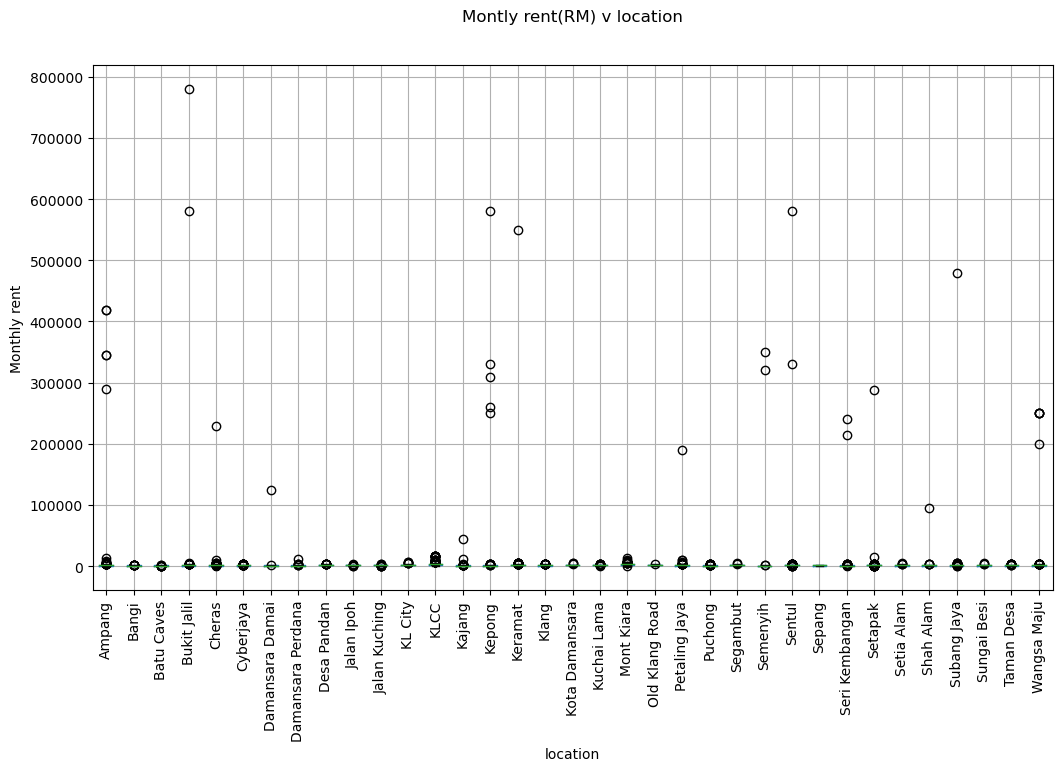

In [328]:
df = df[df['location'] != 'Other']
fig, ax = plt.subplots(1,1, figsize =(12,7))
df.boxplot('monthly_rent', 'location', ax=ax)
plt.suptitle('Montly rent(RM) v location')
plt.title('')
plt.ylabel('Monthly rent')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

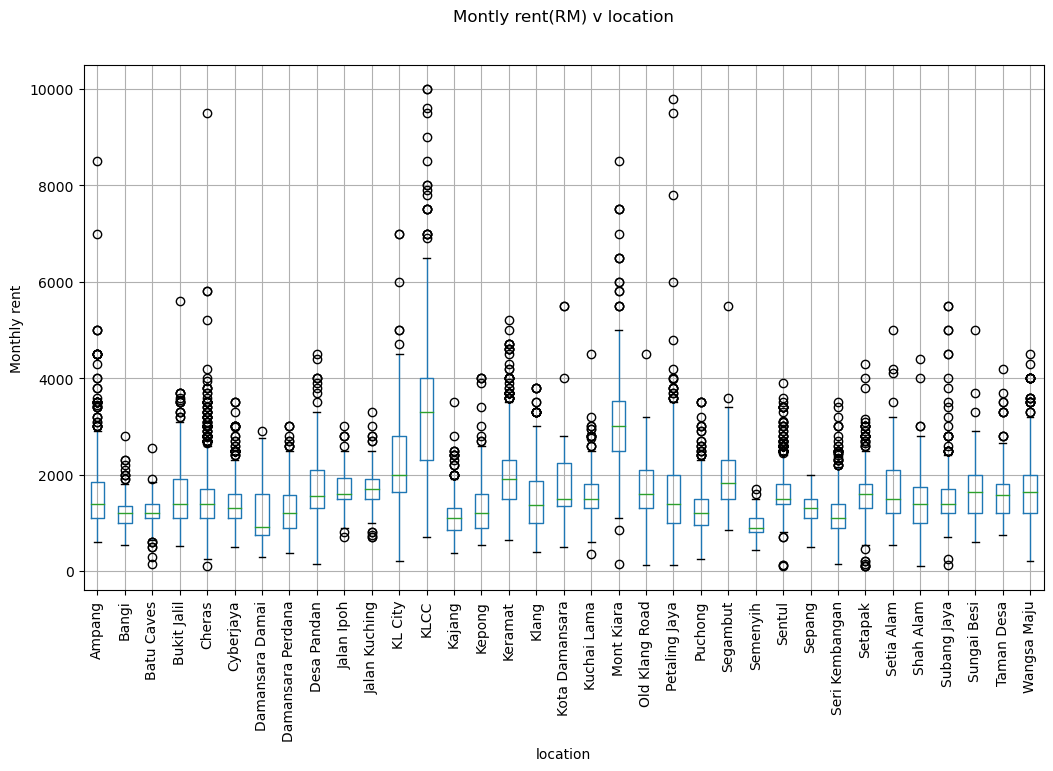

In [329]:
df = df[df["monthly_rent"] >= 100]
df = df[df["monthly_rent"] <= 10000]

fig, ax = plt.subplots(1,1, figsize =(12,7))
df.boxplot('monthly_rent', 'location', ax=ax)
plt.suptitle('Montly rent(RM) v location')
plt.title('')
plt.ylabel('Monthly rent')
plt.xticks(rotation=90)
plt.show

In [330]:
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
1,2300.0,Cheras,Condominium,3.0,1170.0,Partially Furnished
2,1000.0,Taman Desa,Apartment,3.0,650.0,Fully Furnished
3,1700.0,Sentul,Apartment,2.0,743.0,Partially Furnished
4,1299.0,Mont Kiara,Service Residence,1.0,494.0,Not Furnished
5,1500.0,Setapak,Apartment,3.0,884.0,Partially Furnished


In [331]:
df['furnished'].unique()

array(['Partially Furnished', 'Fully Furnished', 'Not Furnished'],
      dtype=object)

In [332]:
df['property_type'].unique()

array(['Condominium', 'Apartment', 'Service Residence', 'Studio', 'Flat',
       'Duplex', 'Others', 'Townhouse Condo'], dtype=object)

In [333]:
df['property_type'].value_counts()

Condominium          7080
Apartment            4496
Service Residence    4070
Flat                  460
Studio                169
Duplex                 70
Others                 66
Townhouse Condo        19
Name: property_type, dtype: int64

In [334]:
property_map = shorten_categories(df.property_type.value_counts(), 500)
df['property_type'] = df['property_type'].map(property_map)
df['property_type'].value_counts()

Condominium          7080
Apartment            4496
Service Residence    4070
Other                 784
Name: property_type, dtype: int64

In [335]:
df = df[df['property_type'] != 'Other']
df['property_type'].value_counts()

Condominium          7080
Apartment            4496
Service Residence    4070
Name: property_type, dtype: int64

In [336]:
df['size'].value_counts()

850.0     1276
800.0      653
1000.0     606
900.0      593
650.0      536
          ... 
1560.0       1
2850.0       1
1478.0       1
1337.0       1
941.0        1
Name: size, Length: 1069, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

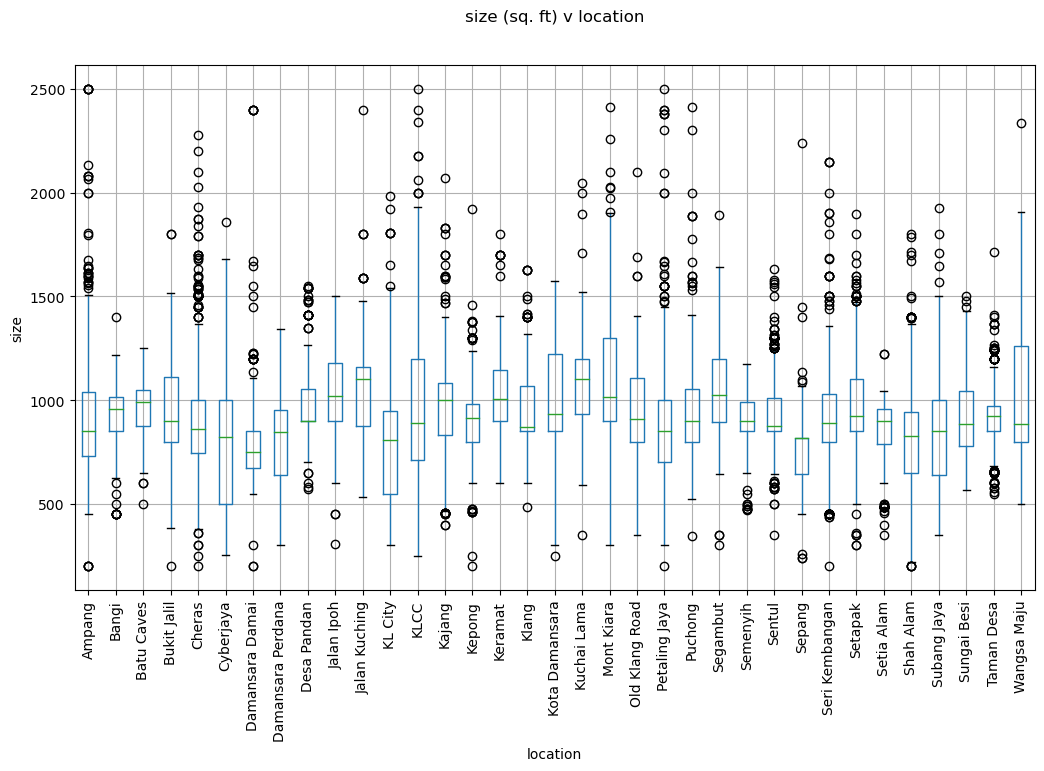

In [337]:
df = df[df["size"] <= 2500]
df = df[df['size'] >= 200]
fig, ax = plt.subplots(1,1, figsize =(12,7))
df.boxplot('size', 'location', ax=ax)
plt.suptitle('size (sq. ft) v location')
plt.title('')
plt.ylabel('size')
plt.xticks(rotation=90)
plt.show

In [338]:
df['size'].value_counts()


850.0     1276
800.0      653
1000.0     606
900.0      593
650.0      536
          ... 
2028.0       1
344.0        1
1523.0       1
1560.0       1
941.0        1
Name: size, Length: 1027, dtype: int64

In [339]:
def clean_size(x):
    if x < 400:
        return 300
    else:
        for i in range(400,2500,50):
            if x >= i and x <= i+50:
                return i
        
    

In [340]:
df['size'] = df['size'].apply(clean_size)
df['rooms'] = df['rooms'].astype(int)

In [341]:
df['size'].value_counts()

800     2084
850     1556
950     1321
900     1261
750     1110
1000    1083
1050    1063
600      746
650      601
700      590
1150     565
1250     434
550      411
400      367
450      353
1200     352
1100     336
500      233
1350     222
1300     156
300      148
1450     121
1400     103
1550      80
1500      67
1650      39
1600      28
1750      24
1850      17
1950      12
2350      12
1700      10
2050      10
1800       9
1900       9
2450       7
2100       4
2250       4
2000       4
2150       3
2300       2
2400       2
2200       1
Name: size, dtype: int64

In [342]:
df = df[df['size'] <= 1500]
df['size'].value_counts()

800     2084
850     1556
950     1321
900     1261
750     1110
1000    1083
1050    1063
600      746
650      601
700      590
1150     565
1250     434
550      411
400      367
450      353
1200     352
1100     336
500      233
1350     222
1300     156
300      148
1450     121
1400     103
1500      67
Name: size, dtype: int64

In [343]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15283 entries, 1 to 19989
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_rent   15283 non-null  float64
 1   location       15283 non-null  object 
 2   property_type  15283 non-null  object 
 3   rooms          15283 non-null  int32  
 4   size           15283 non-null  int64  
 5   furnished      15283 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 776.1+ KB


,monthly_rent,location,property_type,rooms,size,furnished
19983,885.0,Cyberjaya,Condominium,3,1000,Partially Furnished
19985,1500.0,Kajang,Service Residence,2,450,Fully Furnished
19986,1200.0,Kajang,Apartment,3,950,Partially Furnished
19988,1350.0,Kajang,Condominium,3,1250,Partially Furnished
19989,1200.0,Cyberjaya,Service Residence,3,1050,Fully Furnished


In [344]:
df['size'].unique()

array([1150,  600,  700,  450,  850,  950,  650, 1050, 1000,  900,  800,
       1100, 1250, 1500,  500,  750,  300, 1200,  550, 1300, 1400, 1350,
       1450,  400], dtype=int64)

In [345]:
df['location'].unique()

array(['Cheras', 'Taman Desa', 'Sentul', 'Mont Kiara', 'Setapak',
       'Ampang', 'Segambut', 'Bukit Jalil', 'KL City', 'Wangsa Maju',
       'Desa Pandan', 'Old Klang Road', 'Jalan Kuching', 'KLCC', 'Kepong',
       'Jalan Ipoh', 'Sungai Besi', 'Kuchai Lama', 'Keramat', 'Puchong',
       'Cyberjaya', 'Shah Alam', 'Klang', 'Petaling Jaya', 'Subang Jaya',
       'Seri Kembangan', 'Kajang', 'Kota Damansara', 'Batu Caves',
       'Semenyih', 'Damansara Damai', 'Sepang', 'Setia Alam', 'Bangi',
       'Damansara Perdana'], dtype=object)

In [346]:
df['furnished'].unique()

array(['Partially Furnished', 'Fully Furnished', 'Not Furnished'],
      dtype=object)

In [347]:
from sklearn.preprocessing import LabelEncoder
le_furnished = LabelEncoder()
df['furnished'] = le_furnished.fit_transform(df['furnished'])
df['furnished'].unique()

array([2, 0, 1])

In [348]:
df['location'].value_counts()

Cheras               2015
Kajang                954
Setapak               921
Shah Alam             876
Cyberjaya             829
Sentul                755
Puchong               734
Seri Kembangan        635
Kepong                634
Ampang                571
Bukit Jalil           566
Petaling Jaya         509
Klang                 360
Wangsa Maju           357
Taman Desa            293
Keramat               281
Setia Alam            276
Semenyih              268
Old Klang Road        264
KL City               249
Sepang                243
Subang Jaya           241
Mont Kiara            235
Damansara Perdana     231
KLCC                  227
Jalan Ipoh            222
Damansara Damai       184
Kuchai Lama           183
Bangi                 182
Batu Caves            176
Sungai Besi           172
Segambut              170
Desa Pandan           168
Jalan Kuching         154
Kota Damansara        148
Name: location, dtype: int64

In [349]:
df['location'].unique()

array(['Cheras', 'Taman Desa', 'Sentul', 'Mont Kiara', 'Setapak',
       'Ampang', 'Segambut', 'Bukit Jalil', 'KL City', 'Wangsa Maju',
       'Desa Pandan', 'Old Klang Road', 'Jalan Kuching', 'KLCC', 'Kepong',
       'Jalan Ipoh', 'Sungai Besi', 'Kuchai Lama', 'Keramat', 'Puchong',
       'Cyberjaya', 'Shah Alam', 'Klang', 'Petaling Jaya', 'Subang Jaya',
       'Seri Kembangan', 'Kajang', 'Kota Damansara', 'Batu Caves',
       'Semenyih', 'Damansara Damai', 'Sepang', 'Setia Alam', 'Bangi',
       'Damansara Perdana'], dtype=object)

In [350]:
le_locations = LabelEncoder()
df['location'] = le_locations.fit_transform(df['location'])
df['location'].unique()

array([ 4, 33, 25, 19, 28,  0, 23,  3, 11, 34,  8, 20, 10, 12, 14,  9, 32,
       18, 15, 22,  5, 30, 16, 21, 31, 27, 13, 17,  2, 24,  6, 26, 29,  1,
        7])

In [351]:
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
1,2300.0,4,Condominium,3,1150,2
2,1000.0,33,Apartment,3,600,0
3,1700.0,25,Apartment,2,700,2
4,1299.0,19,Service Residence,1,450,1
5,1500.0,28,Apartment,3,850,2


In [352]:
le_property = LabelEncoder()
df['property_type'] = le_property.fit_transform(df['property_type'])
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
1,2300.0,4,1,3,1150,2
2,1000.0,33,0,3,600,0
3,1700.0,25,0,2,700,2
4,1299.0,19,2,1,450,1
5,1500.0,28,0,3,850,2


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15283 entries, 1 to 19989
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_rent   15283 non-null  float64
 1   location       15283 non-null  int32  
 2   property_type  15283 non-null  int32  
 3   rooms          15283 non-null  int32  
 4   size           15283 non-null  int64  
 5   furnished      15283 non-null  int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 597.0 KB


In [354]:
df['rooms'].value_counts()

3    10381
2     2378
1     1598
4      926
Name: rooms, dtype: int64

In [355]:
X = df.drop('monthly_rent', axis=1)
y = df['monthly_rent']

In [356]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [357]:
y_pred = linear_reg.predict(X)

In [358]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [359]:
error

508.87038302377215

In [360]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X.values,y.values)

DecisionTreeRegressor(random_state=0)

In [361]:
y_pred = dec_tree_reg.predict(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [362]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$239.31


In [363]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [364]:
y_pred = random_forest_reg.predict(X)

In [365]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$248.33


In [366]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [367]:
regressor = gs.best_estimator_ #find the best parameter and depth to go

regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$239.31


In [368]:
#LETS TRY POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)

PolynomialFeatures(include_bias=False)

In [369]:
x_ = transformer.transform(X)

In [370]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [371]:
 model = LinearRegression().fit(x_, y.values)

In [372]:
y_pred = model.predict(x_)

In [373]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$483.93


In [374]:
df.head()

,monthly_rent,location,property_type,rooms,size,furnished
1,2300.0,4,1,3,1150,2
2,1000.0,33,0,3,600,0
3,1700.0,25,0,2,700,2
4,1299.0,19,2,1,450,1
5,1500.0,28,0,3,850,2


In [375]:
#NEW ARRAY CREATED TO PREDICT USING THE MODEL
X = np.array([["Kajang", 'Condominium', 3, 1200, 'Partially Furnished']])
X

array([['Kajang', 'Condominium', '3', '1200', 'Partially Furnished']],
      dtype='<U19')

In [376]:
X[:, 0] = le_locations.transform(X[:,0])
X[:, 1] = le_property.transform(X[:, 1])
X[:, 4] = le_furnished.transform(X[:, 4])
X = X.astype(float)
X

array([[1.3e+01, 1.0e+00, 3.0e+00, 1.2e+03, 2.0e+00]])

In [377]:
y_pred = regressor.predict(X)
y_pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1108.82352941])

In [378]:
import pickle

In [379]:
data = {"model": dec_tree_reg, "le_locations": le_locations, "le_property": le_property, "le_furnished": le_furnished}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [380]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_locations = data["le_locations"]
le_property = data["le_property"]
le_furnished = data["le_furnished"]